In [139]:
import numpy as np
import time
import torch
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
import multiprocessing as mp
from typing import Union


from abc import ABC
from epde.preprocessing.cheb import process_point_cheb

from epde.preprocessing.deriv_calculators import Heatmap, AbstractDeriv, AdaptiveFiniteDeriv, PolynomialDeriv, SpectralDeriv, TotalVariation




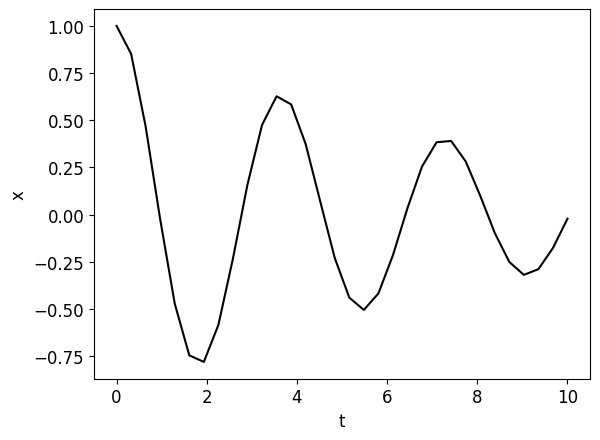

In [155]:
#ode 
data = np.load('data_ode_noise0.npy')         
grid_t = np.linspace(0, 10, 32)
t = np.linspace(0, 10, 32)

plt.plot(t, data, color = 'k', label = 'x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

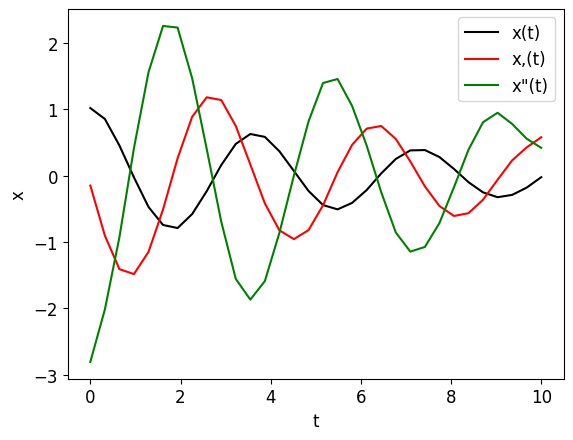

In [119]:
dt = 10 / 32
gradient_t = np.gradient(data, dt, edge_order=2)
gradient_tt = np.gradient(gradient_t, dt, edge_order=2)

plt.plot(t, data, color = 'k', label = 'x(t)')
plt.plot(t, gradient_t, color = 'r', label = 'x,(t)')
plt.plot(t, gradient_tt, color = 'g', label = 'x"(t)')
plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show()




In [120]:
np.save('ode_Gradient_t_noise0.01.npy', gradient_t)
np.save('ode_Gradient_tt_noise0.01.npy', gradient_tt)


(32,)
(32,)


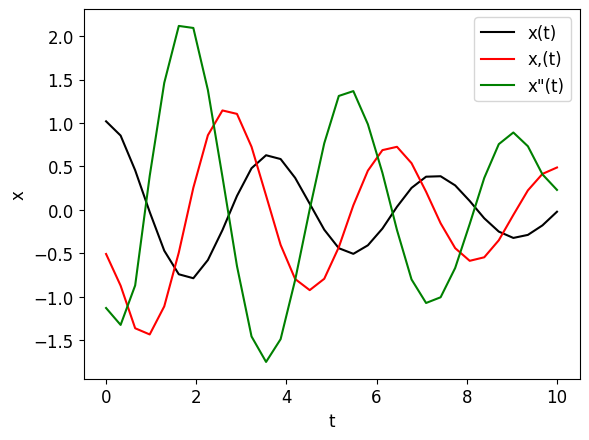

In [147]:
print(data.shape)
print(grid_t.shape)
derivative_calculator = AdaptiveFiniteDeriv()

max_order = [2,]
mixed = False  

derivatives = derivative_calculator(data, [grid_t], max_order, mixed)

plt.plot(t, data, color = 'k', label = 'x(t)')
plt.plot(t, derivatives[:, 0], color = 'r', label = 'x,(t)')
plt.plot(t, derivatives[:, 1], color = 'g', label = 'x"(t)')
plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show()


In [148]:
np.save('ode_Adaptive_t_noise0.01.npy', derivatives[:, 0])
np.save('ode_Adaptive_tt_noise0.01.npy', derivatives[:, 1])

32


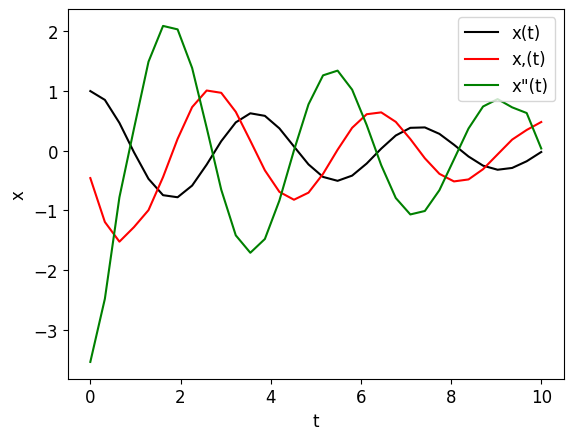

In [156]:
derivative_calculator = PolynomialDeriv()
max_order = 2
grids = [grid_t]
derivatives = derivative_calculator(data, grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2)

plt.plot(t, data, color = 'k', label = 'x(t)')
plt.plot(t, derivatives[:, 0], color = 'r', label = 'x,(t)')
plt.plot(t, derivatives[:, 1], color = 'g', label = 'x"(t)')
plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [157]:
np.save('ode_Polynomial_t_noise0.npy', derivatives[:, 0])
np.save('ode_Polynomial_tt_noise0.npy', derivatives[:, 1])

(32,)
[ 0.72989628 -0.18794651 -1.11081449 -1.59240248 -1.40841946 -0.66807232
  0.27137983  1.01452813  1.31966138  1.16675857  0.69758544  0.10546612
 -0.44238736 -0.8244456  -0.95894106 -0.81331118 -0.43119026  0.05923236
  0.48695517  0.71655427  0.70945788  0.52144738  0.24237966 -0.06507523
 -0.37169803 -0.63312774 -0.74775619 -0.58775637 -0.10531945  0.56615296
  1.11921066  1.22199764]


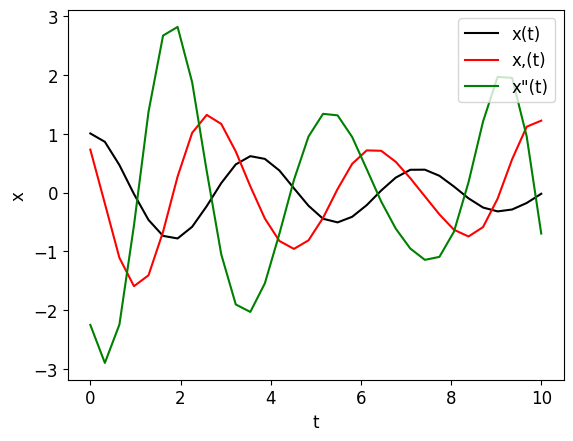

In [90]:
grid = [grid_t]

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_high_ord(data, grid, max_order=2, n=[10, 10], steepness=15)
print(derivatives[0][1])

plt.plot(t, data, color = 'k', label = 'x(t)')
plt.plot(t, derivatives[0][1], color = 'r', label = 'x,(t)')
plt.plot(t, derivatives[1][1], color = 'g', label = 'x"(t)')
plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show()


In [91]:
np.save('ode_Spectral_t_noise0.01.npy', derivatives[0][1])
np.save('ode_Spectral_tt_noise0.01.npy', derivatives[1][1])

For some reason has to be abysmal: (0.21980378998970473, 8.085944521805374)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
For some reason has to be abysmal: (-4.613189359363949, 0.709721242522649)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
5

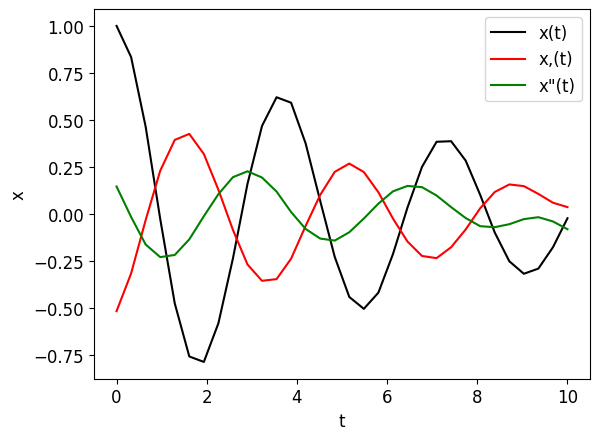

In [23]:
lbd = 100
reg_strng = 50
c_const = 1

derivative_calculator = TotalVariation()

derivatives1 = derivative_calculator.optimize_with_admm(data, lbd, reg_strng, c_const)
derivatives2 = derivative_calculator.optimize_with_admm(derivatives1[0, :], lbd, reg_strng, c_const)

plt.plot(t, data, color = 'k', label = 'x(t)')
plt.plot(t, derivatives1[0, :], color = 'r', label = 'x,(t)')
plt.plot(t, derivatives2[0, :], color = 'g', label = 'x"(t)')
plt.legend(loc = 'upper right')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [24]:
np.save('ode_Total_t_noise0.01.npy', derivatives1[0, :])
np.save('ode_Total_tt_noise0.01.npy', derivatives2[0, :])


Mean Squared Error (MSE) for noise level 0:
  u_tt: 0.011302557689603683
  u_t: 0.0006732724334767611
Mean Squared Error (MSE) for noise level 0.005:
  u_tt: 0.012478476686216707
  u_t: 0.0008127711110538557
Mean Squared Error (MSE) for noise level 0.01:
  u_tt: 0.016045470112983663
  u_t: 0.0012198233750841867


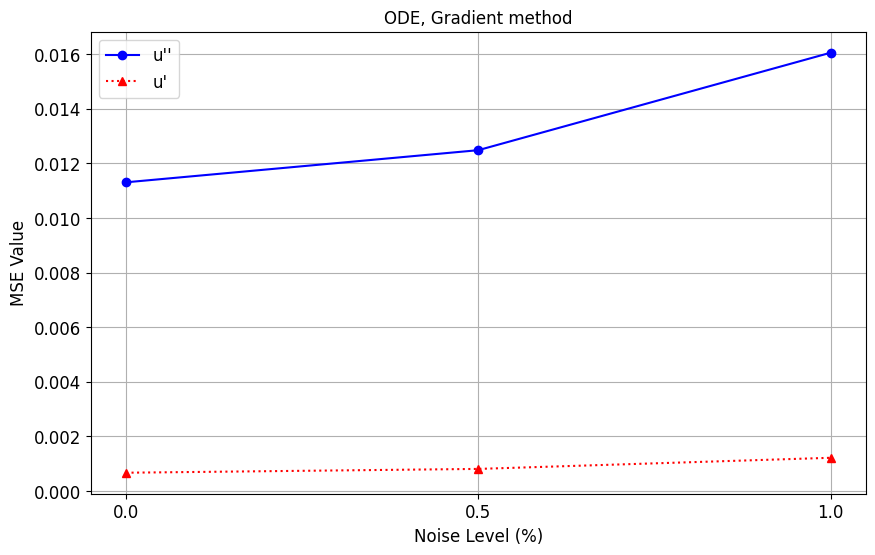

In [144]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_tt = []
mse_values_u_t = []

for noise in noise_levels:
    u_tt = np.load(f'data_ode_noise{noise}_u_tt.npy')
    u_t = np.load(f'data_ode_noise{noise}_u_t.npy')
    
    gradient_tt = np.load(f'ode_Gradient_tt_noise{noise}.npy')
    gradient_t = np.load(f'ode_Gradient_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_tt.append(mse_u_tt)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_tt: {mse_u_tt}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_tt, marker='o', linestyle='-', color='b', label="u''")
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label="u'")

plt.title('ODE, Gradient method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Ode_Gradient_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_tt: 0.15067799266512966
  u_t: 0.00801058064205559
Mean Squared Error (MSE) for noise level 0.005:
  u_tt: 0.14978840219679113
  u_t: 0.007981101647964985
Mean Squared Error (MSE) for noise level 0.01:
  u_tt: 0.16085478573825504
  u_t: 0.009572560846880202


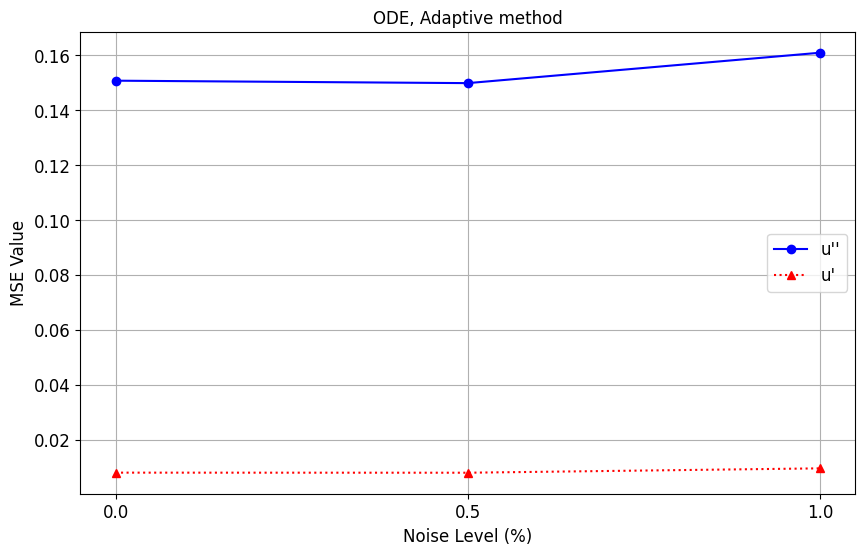

In [149]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_tt = []
mse_values_u_t = []

for noise in noise_levels:
    u_tt = np.load(f'data_ode_noise{noise}_u_tt.npy')
    u_t = np.load(f'data_ode_noise{noise}_u_t.npy')
    
    gradient_tt = np.load(f'ode_Adaptive_tt_noise{noise}.npy')
    gradient_t = np.load(f'ode_Adaptive_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_tt.append(mse_u_tt)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_tt: {mse_u_tt}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_tt, marker='o', linestyle='-', color='b', label="u''")
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label="u'")

plt.title('ODE, Adaptive method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Ode_Adaptive_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_tt: 0.0292442797470185
  u_t: 0.021957228404191183
Mean Squared Error (MSE) for noise level 0.005:
  u_tt: 0.034943135478547244
  u_t: 0.021822264765646332
Mean Squared Error (MSE) for noise level 0.01:
  u_tt: 0.04156056791379174
  u_t: 0.02411505360611077


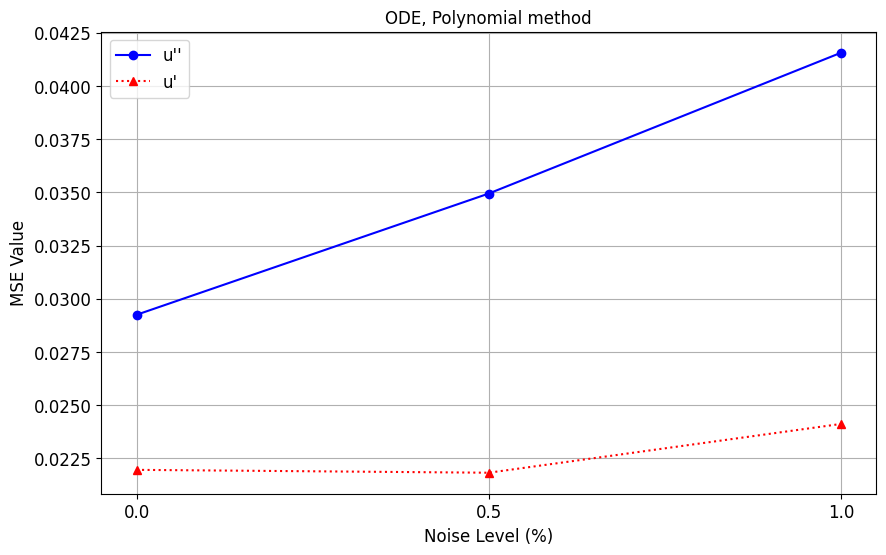

In [158]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_tt = []
mse_values_u_t = []

for noise in noise_levels:
    u_tt = np.load(f'data_ode_noise{noise}_u_tt.npy')
    u_t = np.load(f'data_ode_noise{noise}_u_t.npy')
    
    gradient_tt = np.load(f'ode_Polynomial_tt_noise{noise}.npy')
    gradient_t = np.load(f'ode_Polynomial_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_tt.append(mse_u_tt)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_tt: {mse_u_tt}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_tt, marker='o', linestyle='-', color='b', label="u''")
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label="u'")

plt.title('ODE, Polynomial method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Ode_Polynomial_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_tt: 0.25174475995370893
  u_t: 0.07591895952818403
Mean Squared Error (MSE) for noise level 0.005:
  u_tt: 0.2534445590859783
  u_t: 0.07644843914202429
Mean Squared Error (MSE) for noise level 0.01:
  u_tt: 0.25375424943533265
  u_t: 0.07710845380398765


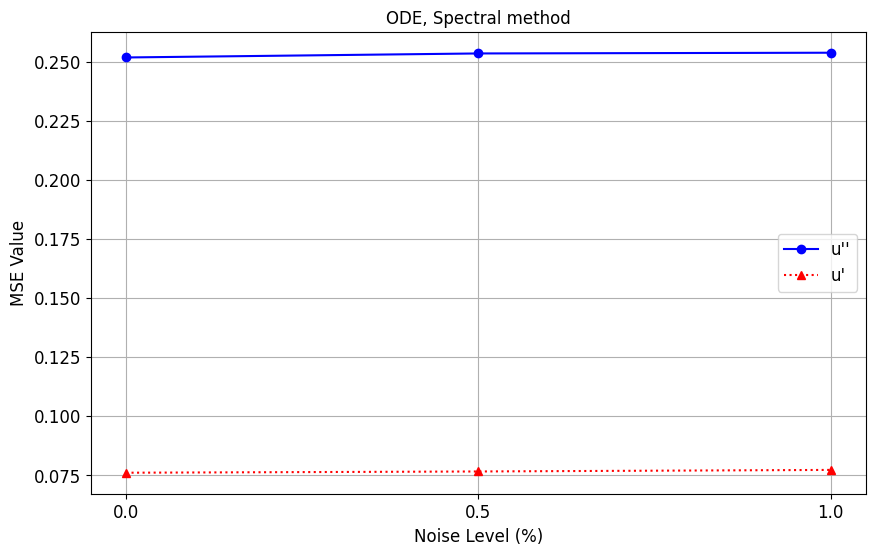

In [159]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_tt = []
mse_values_u_t = []

for noise in noise_levels:
    u_tt = np.load(f'data_ode_noise{noise}_u_tt.npy')
    u_t = np.load(f'data_ode_noise{noise}_u_t.npy')
    
    gradient_tt = np.load(f'ode_Spectral_tt_noise{noise}.npy')
    gradient_t = np.load(f'ode_Spectral_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_tt.append(mse_u_tt)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_tt: {mse_u_tt}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_tt, marker='o', linestyle='-', color='b', label="u''")
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label="u'")

plt.title('ODE, Spectral method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Ode_Spectral_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_tt: 3.9290205007826167
  u_t: 1.123050042893197
Mean Squared Error (MSE) for noise level 0.005:
  u_tt: 6.231815406251052
  u_t: 1.1220360383561139
Mean Squared Error (MSE) for noise level 0.01:
  u_tt: 9.641933585941482
  u_t: 1.1319596635157685


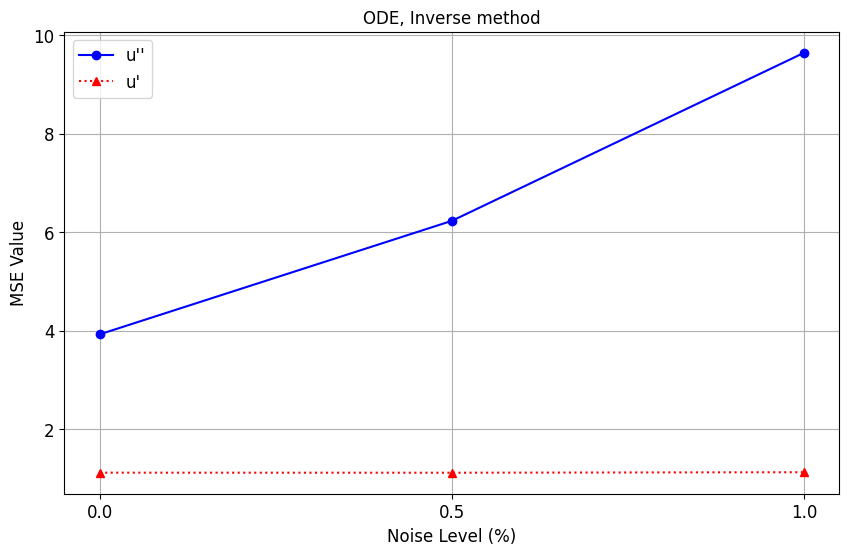

: 

In [ ]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_tt = []
mse_values_u_t = []

for noise in noise_levels:
    u_tt = np.load(f'data_ode_noise{noise}_u_tt.npy')
    u_t = np.load(f'data_ode_noise{noise}_u_t.npy')
    
    gradient_tt = np.load(f'ode_Inverse_tt_noise{noise}.npy')
    gradient_t = np.load(f'ode_Inverse_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_tt.append(mse_u_tt)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_tt: {mse_u_tt}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_tt, marker='o', linestyle='-', color='b', label="u''")
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label="u'")

plt.title('ODE, Inverse method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Ode_Inverse_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_tt: 1.8894530018441085
  u_t: 0.6987713404258448
Mean Squared Error (MSE) for noise level 0.005:
  u_tt: 1.8857101428280765
  u_t: 0.699814591637063
Mean Squared Error (MSE) for noise level 0.01:
  u_tt: 1.9012573782875988
  u_t: 0.6993086511046381


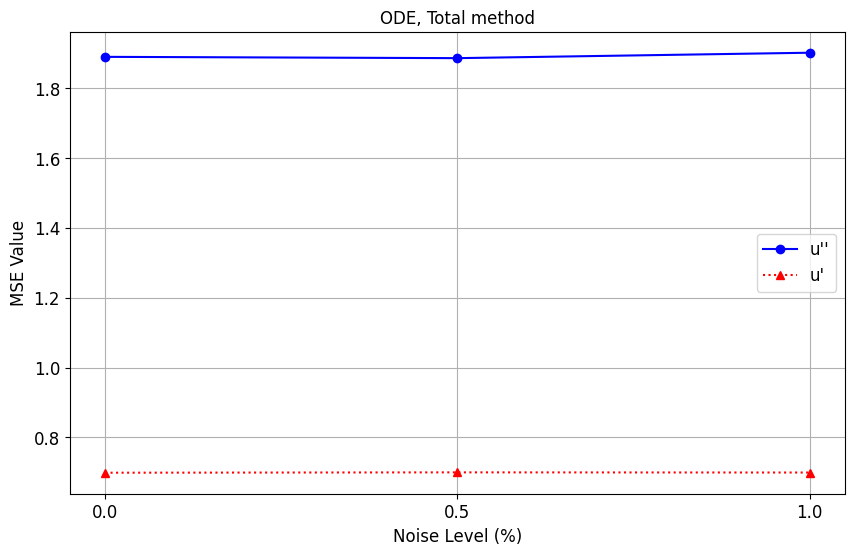

In [161]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_tt = []
mse_values_u_t = []

for noise in noise_levels:
    u_tt = np.load(f'data_ode_noise{noise}_u_tt.npy')
    u_t = np.load(f'data_ode_noise{noise}_u_t.npy')
    
    gradient_tt = np.load(f'ode_Total_tt_noise{noise}.npy')
    gradient_t = np.load(f'ode_Total_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_tt.append(mse_u_tt)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_tt: {mse_u_tt}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_tt, marker='o', linestyle='-', color='b', label="u''")
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label="u'")

plt.title('ODE, Total method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Ode_Total_error.pdf', format='pdf')
plt.show()
